<a href="https://colab.research.google.com/github/riken-emar/StructureLearningDAG/blob/main/CausalNex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#下記ブログを参考にCausalNexを行った。
#有向非循環グラフ（DAG：Directed Acyclic Graph）を推定する構造学習（Structure Learning）,因果推論(変数間の因果関係を推論)
#https://cpp-learning.com/causalnex/

In [2]:
!pip install causalnex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.24.2-cp38-cp38-manylinux2010_x86_64.whl (24.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.0
    Uninstalling scikit-learn-1.2.0:
      Successfully uninstalled scikit-learn-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [3]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.7 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
causalnex 0.11.0 requires scikit-learn!=0.22.2.post1,!=0.24.1,<0.25.0,>=0.22.0; python_version < "3.9", but you have scikit-learn 1.2.0 which is incompatible.


In [4]:
import sklearn
print(sklearn.__version__)

1.2.0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
 
from sklearn.datasets import load_diabetes
 
from causalnex.structure.notears import from_pandas
from causalnex.structure import StructureModel

In [12]:
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) # 説明変数
diabetes_df['target'] = diabetes.target # 目的変数を追加
diabetes_df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


In [14]:
SM = from_pandas(diabetes_df)

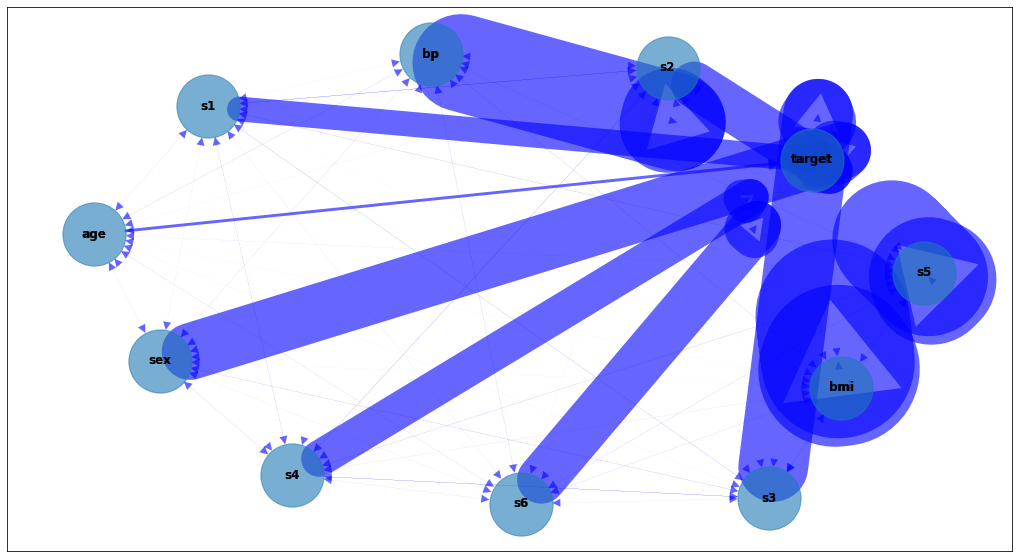

In [18]:
plt.figure(figsize=(18,10))
pos = nx.spring_layout(SM, k=60)
 
edge_width = [ d['weight']*0.3 for (u,v,d) in SM.edges(data=True)]
nx.draw_networkx_labels(SM, pos, font_size=12, font_family="Yu Gothic", font_weight="bold")
nx.draw_networkx(SM,
                 pos,
                 node_size=4000,
                 arrowsize=20,
                 alpha=0.6,
                 edge_color='b',
                 width=edge_width)

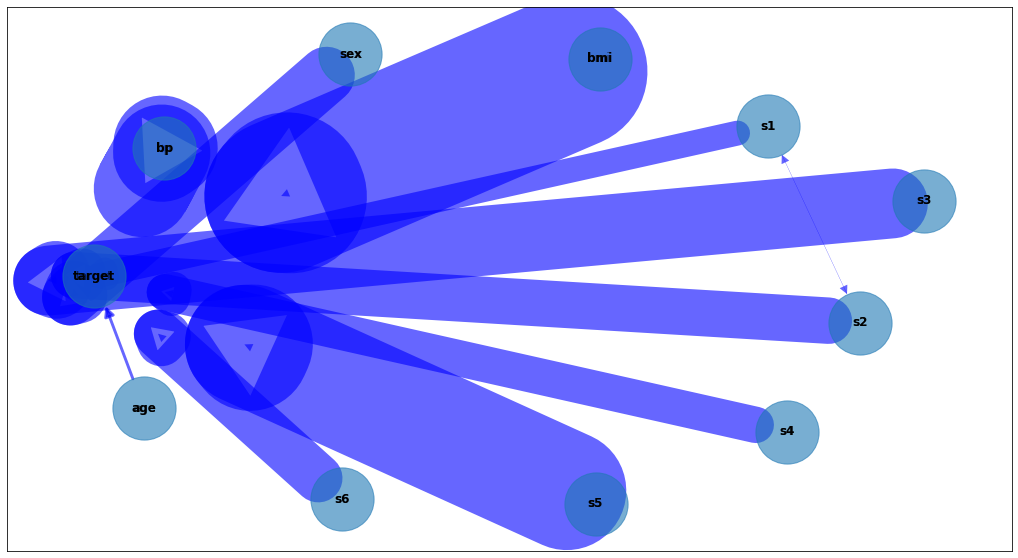

In [24]:
# グラフをコピー
COPY_SM = SM.copy()
 
# 因果関係の弱いエッジを削除
COPY_SM.remove_edges_below_threshold(0.5)
 
# 可視化
plt.figure(figsize=(18,10))
pos = nx.spring_layout(COPY_SM, k=60)
 
edge_width = [ d['weight']*0.3 for (u,v,d) in COPY_SM.edges(data=True)]
nx.draw_networkx_labels(COPY_SM, pos, font_size=12, font_family="Yu Gothic", font_weight="bold")
nx.draw_networkx(COPY_SM,
                 pos,
                 node_size=4000,
                 arrowsize=20,
                 alpha=0.6,
                 edge_color='b',
                 width=edge_width)

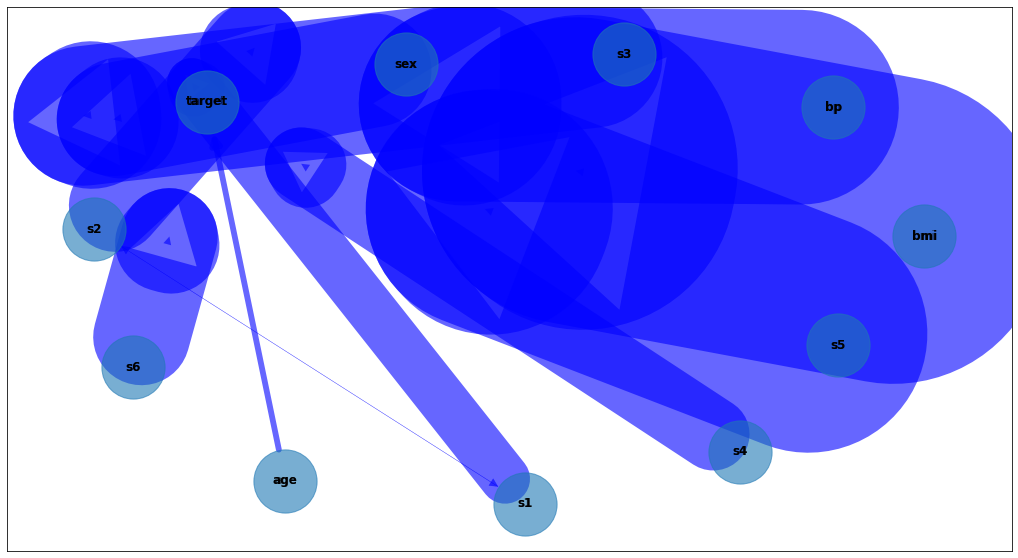

In [36]:
# グラフをコピー
D_SM = SM.copy()
 
# 因果関係の弱いエッジを削除
D_SM.remove_edges_below_threshold(0.5)
 
# ノード削除
#D_SM.remove_nodes_from(['age'])
 
# エッジ削除
#D_SM.remove_edge('age', 'target')
 
# 可視化
plt.figure(figsize=(18,10))
pos = nx.spring_layout(D_SM, k=60)
 
edge_width = [ d['weight']*0.6 for (u,v,d) in D_SM.edges(data=True)]
nx.draw_networkx_labels(D_SM, pos, font_size=12, font_family="Yu Gothic", font_weight="bold")
nx.draw_networkx(D_SM,
                 pos,
                 node_size=4000,
                 arrowsize=20,
                 alpha=0.6,
                 edge_color='b',
                 width=edge_width)